이 내용들은 전부 딥 러닝을 이용한 자연어 처리 입문 (Won Joon Yoo)[링크](https://wikidocs.net/book/2155)에서 참고했습니다.

## 01. 자연어처리(natural language processing) 준비하기

자연어란 우리가 일상 생활에서 사용하는 언어를 말합니다. 자연어 처리란 이러한 자연어의 의미를 분석하여 컴퓨터가 처리할 수 있도록 하는 일을 말합니다.

자연어 처리는 음성 인식, 내용 요약, 번역, 사용자 감성 분석, 텍스트 분류 작업(스팸 메일 분류, 뉴스 기사 카테고리 분류), 질의 응답 시스템, 챗봇과 같은 곳에서 사용되는 분야입니다. 

여기서는 자연어 처리에 필요한 전처리 방법, 딥 러닝 이전 주류로 사용되었던 통계 기반의 언어 모델, 그리고 자연어 처리의 비약적인 성능을 이루어낸 딥 러닝을 이용한 저연어 처리에 대한 전반적인 지식을 다룹니다.  

이번 챕터는 자연어 처리 공부를 시작하기에 앞서 기본적인 셋팅 방법과 앞으로 공부하게 될 머신 러닝에 대한 전체적인 워크플로우에 대해서 다룹니다.

### 1) 아나콘다(Anaconda)와 코랩(Colab)

머신 러닝 실습을 위해서는 많은 패키지가 필요합니다. 이를 일일히 설치하는 것보다는 필요한 패키지들을 모아놓은 파이썬 배포판 `아나콘다`를 설치하는 것을 권장합니다. 여기서는 윈도우 환경을 기준으로 두고 아나콘다를 설치하는 방법과 인터넷을 통해 편하게 사용할 수 있는 파이썬 실습 환경인 구글의 `코랩`을 소개합니다.

#### 1. 아나콘다 설치 [설치 링크](https://www.anaconda.com/distribution/)
```python
conda update -n base conda
conda update --all
```
아나콘다 프롬프트에 이 커맨드를 입력하여 아나콘다 파이썬 패키지를 전부 최신 버젼으로 업데이트 합니다.  

#### 2. 구글의 코랩
인터넷만 된다면 파이썬을 실습할 수 있는 구글의 코랩이 있습니다. 구글의 Colab은 뒤에서 설명하게 될 `주피터 노트북`과 매우 유사한 실습 환경을 제공합니다.

### 2) 필요 프레임워크와 라이브러리 

아나콘다에 포함되어있지 않은 tensorflow, keras, gensim과 같은 패키지만을 별도로 pip을 통해 설치합니다.

#### 1. 텐서플로우(Tensorflow)

텐서플로우는 구글이 2015년에 공개한 머신 러닝 오픈소스 라이브러리입니다. <u>머신 러닝과 딥 러닝을 직관적이고 손쉽게 할 수 있도록 설계되었습니다.</u> 

아나콘다 프롬프트 또는 명령 프롬프트에서 아래의 코드를 이용해 설치할 수 있습니다. 
```python
pip install tensorflow
```


In [2]:
import tensorflow as tf
tf.__version__

'2.9.1'

#### 2. 케라스(Keras)  

케라스는 딥 러닝 프렝미워크인 텐서플로우에 대한 추상화 된 API를 제공합니다. <u>케라스는 백엔드로 텐서플로우를 사용하며, 좀 더 쉽게 딥 러닝을 사용할 수 있게 해줍니다.</u> 쉽게 말해, 텐서플로우 코들르 휠씬 간단하게 작성할 수 있습니다.

```python
pip install keras
```

케라스를 설치 후에 사용할 수도 있지만, 텐서플로우에서 케라스를 사용할 수도 있습니다. 순수 케라스를 keras라고 표기한다면, 텐서플로우에서 케라스 API를 사용하는 경우는 tf.keras라고 표기합니다. 이 두가지는 실제로 문법도 많은 면에서 같습니다. 하지만 케라스 개발자인 프랑소와 숄레는 앞으로는 <u>keras 보다는 tf.keras를 사용할 것을 권장합니다.</u>

In [3]:
import keras
keras.__version__
tf.keras.__version__

'2.9.0'

#### 3. 젠심(Gensim)

<u>젠심은 머신 러닝을 사용하여 토픽 모델링과 자연어 처리 등을 수행할 수 있게 해주는 오픈 소스 라이브러리입니다.</u> 여기서도 젠심을 사용하여 Word2Vec 등 다양한 모델들을 학습해볼 것입니다.
```python
pip install gensim
```

In [4]:
import gensim
gensim.__version__

'4.1.2'

#### 4. 사이킷런(Scikit-learn)

사이킷런은 파이썬 머신러닝 라이브러리입니다. <u>사이킷런을 통해 나이브 베이즈 분류, 서포트 벡터 머신 등 다양한 머신 러닝 모듈을 불러올 수 있습니다.</u> 또한, 사이킷런에는 머신러닝을 연습하기 위한 아이리스 데이터, 당뇨병 데이터 등 자체 데이터 또한 제공하고 있습니다.  
자세한 자체 데이터 내용은 [여기](https://rudolf-2434.tistory.com/2)에서 확인할 수 있습니다.  
```python
pip install scikit-learn
```


In [5]:
import sklearn
sklearn.__version__

'1.1.1'

#### 5. 주피터 노트북(Jupyter Notebook)

주피터 노트북은 웹에서 코드를 작성하고 실행할 수 있는 오픈소스 웹 어플리케이션입니다. 
```python
pip install jupyter
```  
설치가 완료되었다면 프롬프트에 다음 명령어를 통해 주피터 노트북을 실행할 수 있습니다.
```python
jupyter notebook
```

### 3) 자연어 처리를 위한 NLTK와 KoNLPy 설치하기

텍스트 전처리(Text preprocessing) 챕터에서는 전처리를 위한 이론에 대해서 학습하고, 그 이론을 바탕으로 실습을 진행합니다. 그리하여 실습에 필요한 기본적인 자연어 패키지들을 소개합니다.

#### 1. NLTK와 NLTK Data 설치

<u>NLTK는 자연어 처리를 위한 파이썬 패키지입니다.</u> 아나콘다를 설치하였다면 NLTK는 기본적으로 설치가 되어져 있습니다. 만약 아나콘다를 설치하지 않았다면 아래의 커맨드로 NLTK를 별도 설치할 수 있습니다.
```python
pip install nltk
```

In [6]:
import nltk
nltk.__version__

'3.7'

NLTK의 기능을 제대로 사용하기 위해서는 NLTK Data라는 여러 데이터를 추가적으로 설치해야 합니다. 이를 위해서는 아나콘다 프롬프트에서 ipython을 이용하여 아래의 코드를 실행합니다.
```python
import nltk
nltk.download('데이터 이름')
```

In [7]:
nltk.download('treebank') # 아나콘다 콘솔창에서 ipython으로 다운받기

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\komos\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

#### 2. KoNLPy 설치

<u>KoNLPy는 한국어 자연어 처리를 위한 형태소 분석기 패키지입니다.</u> 프롬프트에서 아래 커맨드로 설치합니다.  
```python
pip install konlpy
```


In [8]:
import konlpy
konlpy.__version__

'0.6.0'

### 4) 판다스(Pandas)와 넘파이(Numpy), 맷플롭립(Matplotlib)

#### 1. Pandas

Pandas는 파이썬 데이터 처리를 위한 라이브러리입니다. 파이썬을 이용한 데이터 분석과 같은 작업에서 필수 라이브러리입니다. 

In [9]:
import pandas as pd
pd.__version__

'1.4.3'

Pandas의 경우 pd라는 명칭으로 임포트하는 것이 관례입니다.  

Pandas는 총 세 가지의 데이터 구조를 사용합니다.

* 시리즈(Series)
* 데이터프레임(DataFrame)
* 패널(Panel)

이 중 데이터프레임이 가장 많이 사용됩니다.

##### (1) 시리즈(Series)

시리즈 클래스는 1차원 배열의 값에 각 값에 대응하는 인덱스를 부여할 수 있는 구조를 갖고 있습니다.

In [10]:
sr = pd.Series([17000, 18000, 1000, 5000], index = ['피자', '치킨', '콜라', '맥주'])
print('시리즈 출력 : ')
print('-' * 15)
print(sr)

시리즈 출력 : 
---------------
피자    17000
치킨    18000
콜라     1000
맥주     5000
dtype: int64


In [11]:
print(f'시리즈의 값 : {sr.values}')
print(f'시리즈의 인덱스 : {sr.index}')

시리즈의 값 : [17000 18000  1000  5000]
시리즈의 인덱스 : Index(['피자', '치킨', '콜라', '맥주'], dtype='object')


##### (2) 데이터프레임(DataFrame)

데이터프레임은 2차원 리스트를 매개변수로 전달합니다. 2차원이므로 행방향 인덱스와 열방향 인덱스가 존재합니다. 다시 말해 행과 열을 가지는 자료구조입니다. 시리즈가 인덱스와 값으로 구성된다면, 데이터프레임은 열까지 추가되어 열, 인덱스, 값으로 구성됩니다. 

In [12]:
value = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
index = ['one', 'two', 'three']
columns = ['A', 'B', 'C']

df = pd.DataFrame(value, index = index, columns = columns)
print('데이터프레임 출력')
print('-' * 15)
print(df)

데이터프레임 출력
---------------
       A  B  C
one    1  2  3
two    4  5  6
three  7  8  9


In [13]:
print(f'데이터프레임 인덱스 : {df.index}')
print(f'데이터프레임 열이름 : {df.columns}')
print('데이터프레임 값')
print('-' * 15)
print(df.values)

데이터프레임 인덱스 : Index(['one', 'two', 'three'], dtype='object')
데이터프레임 열이름 : Index(['A', 'B', 'C'], dtype='object')
데이터프레임 값
---------------
[[1 2 3]
 [4 5 6]
 [7 8 9]]


##### (3) 데이터프레임의 생성

데이터프레임은 리스트, 시리즈, 딕셔너리, Numpy의 ndarrays, 또 다른 데이터프레임으로부터 생성할 수 있습니다. 여기서는 리스트와 딕셔너리를 사용하여 데이터프레임을 생성해보겠습니다.

In [14]:
# 리스트를 이용하여 DataFrame 생성하기
data = [
    ['1000', 'Steve', 90.72],
    ['1001', 'James', 78.09],
    ['1002', 'Doyeon', 98.43],
    ['1003', 'Jang', 64.19],
    ['1004', 'Pilwoong', 81.30],
    ['1005', 'Tony', 99.14]
]

df = pd.DataFrame(data)
print(df)

      0         1      2
0  1000     Steve  90.72
1  1001     James  78.09
2  1002    Doyeon  98.43
3  1003      Jang  64.19
4  1004  Pilwoong  81.30
5  1005      Tony  99.14


생성된 데이터프레임에 열을 지정해줄 수 있습니다. 

In [15]:
df = pd.DataFrame(data, columns = ['학번', '이름', '점수'])
print(df)

     학번        이름     점수
0  1000     Steve  90.72
1  1001     James  78.09
2  1002    Doyeon  98.43
3  1003      Jang  64.19
4  1004  Pilwoong  81.30
5  1005      Tony  99.14


In [16]:
# 딕셔너리를 이용하여 DataFrame 생성하기
data = {
    '학번' : ['1000', '1001', '1002', '1003', '1004', '1005'],
    '이름' : ['Steve', 'James', 'Doyeon', 'Jang', 'Pilwoong', 'Tony'],
    '점수' : [90.72, 78.09, 98.43, 64.19, 81.30, 99.14]
}

df = pd.DataFrame(data)
print(df)

     학번        이름     점수
0  1000     Steve  90.72
1  1001     James  78.09
2  1002    Doyeon  98.43
3  1003      Jang  64.19
4  1004  Pilwoong  81.30
5  1005      Tony  99.14


##### (4) 데이터프레임 조회하기

아래의 명령어들은 데이터프레임에서 원하는 구간만 확인하기 위한 명령어로서 유용하게 사용됩니다.

* df.head(n) : 앞 부분을 n개만 보기
* df.tail(n) : 뒷 부분을 n개만 보기
* df['열이름'] : 해당되는 열을 확인

In [17]:
print(df.head(3))

     학번      이름     점수
0  1000   Steve  90.72
1  1001   James  78.09
2  1002  Doyeon  98.43


In [18]:
print(df.tail(3))

     학번        이름     점수
3  1003      Jang  64.19
4  1004  Pilwoong  81.30
5  1005      Tony  99.14


In [19]:
print(df['학번'])

0    1000
1    1001
2    1002
3    1003
4    1004
5    1005
Name: 학번, dtype: object


##### (5) 외부 데이터 읽기

Pandas는 CSV, Text, Excel, SQL, HTML, JSON 등 다양한 데이터 파일을 읽고 데이터프레임을 생성할 수 있습니다.

```python
df = pd.read_csv('파일경로 + 파일.확장자')
print(df)
```

#### 2. 넘파이(Numpy)

넘파이는 수치 데이터를 다루는 파이썬 패키지입니다. Numpy의 핵심이라고 불리는 다차원 행렬 자료구조인 ndarray를 통해 벡터 및 행렬을 사용하는 선형 대수 계산에서 주로 사용됩니다. Numpy는 편의성뿐만 아니라, 속도면에서도 순수 파이썬에 비해 압도적으로 빠르다는 장점이 있습니다.

In [20]:
import numpy as np
np.__version__

'1.21.5'

Numpy의 경우 np라는 명칭으로 임포트하는 것이 관례입니다. 

##### (1) np.array()

Numpy의 핵심은 ndarray입니다. np.array()는 리스트, 튜플, 배열로 부터 ndarray를 생성합니다. 

In [21]:
# 1차원 배열
ls = [1, 2, 3, 4, 5]
vec = np.array(ls)
print(vec)

[1 2 3 4 5]


2차원 배열은 array() 안에 하나의 리스트만 들어가므로 리스트의 리스트를 넣어야 한다는 주의사항이 있습니다.

In [22]:
# 2차원 배열 
ls = [[10, 20, 30], [40, 50, 60]] 
mat = np.array(ls)
print(vec)

[1 2 3 4 5]


In [23]:
print(f'vec의 타입 : {type(vec)}')
print(f'mat의 타입 : {type(mat)}')

vec의 타입 : <class 'numpy.ndarray'>
mat의 타입 : <class 'numpy.ndarray'>


Numpy 배열에는 축의 개수(ndim)와 크기(shape)라는 개념이 존재하는데, 배열의 크기를 정확히 숙지하는 것은 딥 러닝에서 매우 중요합니다. 

In [24]:
print(f'vec의 축의 개수 : {vec.ndim}')
print(f'vec의 크기(shape) : {vec.shape}')

vec의 축의 개수 : 1
vec의 크기(shape) : (5,)


In [25]:
print(f'mat의 축의 개수 : {mat.ndim}')
print(f'mat의 크기(shape) : {mat.shape}')

mat의 축의 개수 : 2
mat의 크기(shape) : (2, 3)


##### (2) ndarray의 초기화

ndarray를 만드는 다양한 다른방법이 존재합니다. 

np.zeros()는 배열의 모든 원소에 0을 삽입합니다.

In [26]:
# 모든 값이 0인 2x3 배열 생성
zeros_mat = np.zeros((2, 3))
print(zeros_mat)

[[0. 0. 0.]
 [0. 0. 0.]]


np.ones()는 배열의 모든 원소에 1을 삽입합니다.

In [27]:
# 모든 값이 1인 2x3 배열 생성
ones_mat = np.ones((2, 3))
print(ones_mat)

[[1. 1. 1.]
 [1. 1. 1.]]


np.full()은 배열에 사용자가 지정한 값을 삽입합니다.

In [28]:
# 모든 값이 특정 상수인 배열 생성
same_value_mat = np.full((2, 3), 7)
print(same_value_mat)

[[7 7 7]
 [7 7 7]]


np.eye()는 단위행렬을 생성합니다.

In [29]:
# 단위행렬 배열 생성
eye_mat = np.eye(3)
print(eye_mat)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


np.random.random()은 임임의 값을 가지는 배열을 생성합니다.

In [30]:
# 임의의 값으로 채워진 배열 생성
random_mat = np.random.random((2, 3))
print(random_mat)

[[0.96345682 0.66609107 0.81700229]
 [0.52387823 0.66283696 0.18852439]]


##### (3) np.arange()

np.arange(n)은 0부터 n-1까지의 값을 가지는 배열을 생성합니다.

In [31]:
range_vec = np.arange(10)
print(range_vec)

print('\n')

n = 2
range_vec = np.arange(1, 10, n)
print(range_vec)

[0 1 2 3 4 5 6 7 8 9]


[1 3 5 7 9]


##### (4) np.reshape()

np.reshape()은 내부 데이터는 변경하지 않으면서 배열의 구조를 바꿉니다.

In [32]:
reshape_mat = np.array(np.arange(30)).reshape(5, 6)
print(reshape_mat)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]]


##### (5) Numpy 슬라이싱

ndarray를 통해 만든 다차원 배열은 파이썬의 자료구조인 리스트처럼 슬라이싱 기능을 지원합니다. 슬라이싱 기능을 사용하여 특정 행이나 열들으 원소들을 접근할 수 있습니다.

In [33]:
mat = np.array([[1, 2, 3], [4, 5, 6]])
print(mat)

[[1 2 3]
 [4 5 6]]


In [34]:
# 첫번째 행 출력
print(mat[0 ,:])

[1 2 3]


In [35]:
# 두번째 열 출력
print(mat[:, 1])

[2 5]


##### (6) Numpy 정수 인덱싱

슬라이싱을 사용하면 배열로부터 부분 배열을 추출할 수 있지만, 연속적이지 않은 원소로 배열을 만들 경우에는 슬라이싱으로는 만들 수 없습니다. 이런 경우에는 인덱싱을 사용하여 배열을 구성할 수 있습니다. 인덱싱은 원하는 위치의 원소들을 뽑을 수 있습니다.

In [37]:
mat = np.array([[1, 2], [4, 5], [7, 8]])
print(mat)

print(mat[[2, 1], [1, 1]])

indexing_mat = mat[[2, 1], [1, 1]]
print(indexing_mat)

[[1 2]
 [4 5]
 [7 8]]
[8 5]
[8 5]


##### (7) Numpy 연산

Numpy를 사용하면 배열간 연산을 손쉽게 수행할 수 있습니다. +, -, *, /를 사용할 수 있으며 또는 np.add(), np.subtract(), np.multiply(), np.divide()를 사용할 수도 있습니다.

In [38]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

In [39]:
result = x + y
print(result)

result = x - y
print(result)

result = x * y
print(result)

result = x / y
print(result)

[5 7 9]
[-3 -3 -3]
[ 4 10 18]
[0.25 0.4  0.5 ]


위에서 *를 통해 수행한 것은 요소별 곱입니다. Numpy에서 벡터와 행렬의 곱 또는 행렬곱을 위해서는 dot()을 사용해야 합니다.

In [40]:
mat1 = np.array([[1, 2], [3, 4]])
mat2 = np.array([[5, 6], [7, 8]])
mat3 = np.dot(mat1, mat2)
print(mat3)

[[19 22]
 [43 50]]


#### 3. 맷플롯립(Matplotlib)

Matplotlib은 데이터를 차트나 plot으로 시각화하는 패키지입니다. 데이터 분석에서 Matplotlib은 데이터 분석 이전에 데이터 이ㅐㅎ를 위한 시각화나, 데이터 분석 후에 결과를 시각화하기 위해서 사용됩니다.

##### (1) 라인 플롯 그리기

plot()은 라인 plot을 그리는 기능을 수행합니다. plot()에 x축과 y축의 값을 기재하고 그림을 표시하는 show()를 통해서 시각화합니다. 추가적으로 title('제목')을 사용하여 그래프의 제목을 지정할 수 있으며, xlabel('X 라벨'), ylabel('Y 라벨')을 이용해 축의 이름을 지정할 수 있습니다. 또한 legend('범례1', '범례2')를 이용하여 다수의 plot의 범례를 지정할 수 있습니다.

<function matplotlib.pyplot.show(close=None, block=None)>

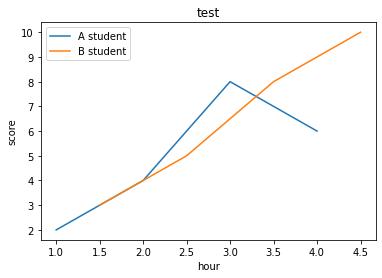

In [41]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4], [2, 4, 8, 6])
plt.plot([1.5, 2.5, 3.5, 4.5], [3, 5, 8, 10])
plt.title('test')
plt.xlabel('hour')
plt.ylabel('score')
plt.legend(['A student', 'B student'])
plt.show

### 5) 판다스 프로파이링(Pandas-Profiling)

좋은 머신 러닝 결과를 얻기 위해서는 데이터의 성격을 파악하는 과정이 선행되어야 합니다. 이 과정에서 데이터 내 값의 분포, 변수 간의 관계, Null 값과 같은 결측값 존재 유무 등을 파악하게 되는데 이와 같이 데이터를 파악하는 과정을 EDA(Exploratory Data Analysis)이라고 합니다. 이번에는 방대한 양의 데이터를 가진 데이터프레임을 .profiling_report()라는 단 한 줄의 명령으로 탐색하는 패키지인 판다스 프로파일링을 소개합니다.

아나콘다 프롬프트에서 아래의 pip 명령을 통해 패키지를 설치합니다.  
```python
conda install -c conda-forge pandas-profiling
```

#### 1. 실습 파일 불러오기

실습을 위해 아래 링크에서 spam.csv란 파일을 다운로드 했습니다.  
[링크](https://www.kaggle.com/uciml/sms-spam-collection-dataset)  

spam.csv를 다운로드 받았다면 해당 파일을 불러왔습니다.

In [54]:
import pandas as pd
import pandas_profiling

data = pd.read_csv('C:/Users/komos/pytorch/NLP/spam.csv', encoding='latin1')

여기서 encoding은 파일을 불러올 때 데이터가 잘 불러오기 위해 encoding을 지정하는 것입니다. csv 를 읽을 때 encoding을 utf-8로 하면 에러가 발생합니다. 그래서 encoding을 latin1으로 설정해야 합니다. 하지만 만약 불러오기 전이나 후에 엑셀 또는 csv 파일을 열었을 경우 다시 불러오면 데이터 내의 한글파일이 깨져있을 수 있습니다. 이는 파일을 열었을 때 encoding이 cp949로 변경되기 때문입니다. 그래서 이러한 깨짐현상이 나타났을 경우 encoding을 cp949로 변경해야합니다.  
자세한 내용은 [링크](https://kamang-it.tistory.com/245)에서 확인가능합니다.

In [45]:
data[:5]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


이 데이터에는 총 5개의 열이 있는데, 여기서 Unnamed라는 이름의 3개의 열은 5개의 행만 출력했음에도 벌써 Null값이 보입니다. v1열은 해당 메일이 스팸인지 아닌지를 나타내는 레이블에 해당되는 열입니다. ham은 정상 메일을 의미하고, spam은 스팸메일을 의미합니다. v2열은 메일의 본문을 담고 있습니다.

실행을 하다보면 에러가 발생할 수도 있습니다. 
```python
ImportError: cannot import name 'soft_unicode' from 'markupsafe' ...
```
이는 pandas profiling을 실행하기 위해서는 markupsafe에서 `soft_unicode`가 필요한데 markupsafe의 최신 버전에서는 soft_unicode가 빠져서 발생하는 에러입니다.  
그리하여 이전 버전(2.0.1)의 markupsafe를 다운받으면 됩니다.
```python
pip install markupsafe==2.0.1
```

In [43]:
pr = pandas_profiling.ProfileReport(data) # data.profile_report() 도 가능
pr.to_file('./pr_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

데이터프레임에 .profile_report()(pandas_profiling.ProfileReport(data)로도 가능)를 사용하여 데이터를 프로파일링한 리포트를 생성할 수 있습니다.   

주피터 노트북으로 리포트를 확인할 수도 있겠지만, 위의 .to_file() 명령을 통해 HTML파일로 저장하는 것도 가능합니다.

#### 2. 리포트 살펴보기

##### (1) 개요(Overview)

Overview는 데이터의 전체적인 개요를 보여줍니다. 변수의 수, 데이터의 크기, 결측값 비율, 데이터의 종류는 어떤 것이 있는지를 볼 수 있습니다.

Dataset statistics를 살펴보면 해당 데이터는 총 5572개의 행을 가지고 있으며, 5개의 열을 가지고 있습니다. 하나의 값을 셀이라고 하였을 때, 총 5572 x 5 개의 데이터가 존재하지만 16648개(59.8%)의 결측값이 있는 것으로 확인됩니다.

##### (2) 변수(Variables)

변수는 데이터에 존재하는 모든 특성 변수들에 대한 결측값, 중복을 제외한 유일한 값(unique values)의 개수 등의 통계치를 보여줍니다. 또한 데이터의 내용을 우측 바 그래프로 시각화한 결과를 제공합니다.

우선 Unnamed라는 이름을 가진 3개의 열에 대해 알아보겠습니다. 앞서 개요에서 봤듯이 3개의 열 모두 99% 이상의 값이 결측값입니다. 결측값이 아닌 값들은 5572 - 5522 = 50개이며 그 중 중복을 제거한 유일한 값의 개수는 44개입니다. (Distint에서 확인 가능)

그 다음은 다른 2개의 열인 v1과 v2를 보겠습니다. v2는 메일의 본문이고, v1은 해당 메일이 정상 메일인지, 스팸 메일인지 유부가 기재되어져 있습니다. v1의 경우 유일한 값의 개수가 2개뿐으로 우측 바 그래프를 통해 4825개가 ham, 747가 spam인 것을 알 수 있습니다. 이는 데이터에서 정상 메일 샘플이 훨씬 많다는 것을 보여줍니다. v2의 경우 5572개의 메일 본문 중에서 중복을 제외하면 5169개의 유일한 내용의 메일 본문을 갖고 있습니다. 그 중 중복이 가장 많은 메일은 Sorry, I'll call later 이라는 내용의 메일로 총 30개의 메일이 존재합니다.

또한 v1과 v2 모두 결측값은 존재하지 않는데, 이는 결과적으로 데이터 전처리를 수행할 때, Unnamed라는 3개의 열을 제거하고 나서는 별도의 결측값 전처리는 필요가 없음을 의미합니다.

이번에는 각 변수에 있는 상세사항 확인하기(Toggle details)를 알아보겠습니다.

##### (3) 상세사항 확인하기(Toggle details)

상세사항 확인하기에서는 총 4개의 탭이 존재하는데, 첫번째 탭인 Overview에서는 변수 내용의 문자열 개수, 전체 문자열 개수, 중복 되지 않는 문자열 개수, 유일한 단어 개수 등을 알려줍니다. 이 후 Categories, Word 에서는 데이터의 빈도를 바 그래프로 나타내주고, Characters 에서는 문자열의 빈도를 나타내줍니다.




### 6) 머신 러닝 워크플로우(Machine Learning Workflow)

이번에는 데이터 사이언스 또는 머신 러닝과정에서 거치는 전반적인 과정에 대해서 알아보겠습니다. 딥 러닝 또한 머신러닝의 한 갤래로 딥 러닝 워크플로우 또한 머신 러닝 워크플로우로 간주 할 수 있습니다.

#### 1. 머신 러닝 워크플로우(Machine Learning Workflow)

데이터를 수집하고 머신 러닝을 하는 과정을 크게 6가지로 나누면, 아래의 그림과 같습니다. ![머신_러닝_워크플로우](https://user-images.githubusercontent.com/60602671/187525048-5245e6aa-b0f0-4702-84ab-675e5f0502d8.png)

##### (1) 수집(Acquisition)

머신 러닝을 하기 위해서는 기계에 학습시켜야 할 데이터가 필요합니다. 자연어처리의 경우, 자연어 데이터를 `말뭉치 또는 코퍼스(corpus)`라고 부르는데 코퍼스의 의미를 풀이하면, 조사나 연구 목적에 의해서 특정 도메인으로부터 수집된 텍스트 집합을 말합니다. 텍스트 데이터의 파일 형식은 txt파일, csv파일, xml파일 등 다야앟며 그 출처도 음성 데이터, 웹 수집기를 통해 수집된 데이터, 영화 리뷰 등 다양합니다.

##### (2) 점검 및 탐색(Inspection and exploration)

데이터가 수집되었다면, 이제 데이터를 점검하고 탐색하는 단계입니다. 여기서는 데이터의 구조, 노이즈 데이터, 머신 러닝 적용을 위해서 데이터를 어떻게 정제해야하는지 등을 파악합니다.

이 단계를 `탐색적 데이터 분석(Exploratory Data Analysis, EDA) 단계`라고도 하는데 이는 독립 변수, 종속 변수, 변수 유형, 변수의 데이터 타입 등을 점검하며 데이터의 특징과 내재하는 구조적 관계를 알아내는 과정을 의미합니다. 이 과정에서 시각화와 간단한 통계 테스트를 진행하기도 합니다.

##### (3) 전처리 및 정제(Preprocessing and Cleaning)

데이터에 대한 파악이 끝났다면, 머신 러닝 워크플로우에서 가장 까다로운 작업 중 하나인 데이터 전처리 과정에 들어갑니다. 이 단계는 많은 단계를 포함하고 있는데, 가령 자연어 처리라면 토큰화, 전제, 정규화, 불용어 제거 등의 단계를 포함합니다. 빠르고 정확한 데이터 전처리를 하기 위해서는 사용하고 있는 툴(python)에 대한 다양한 라이브러리에 대한 지식이 필요합니다. 정말 까다로운 전처리의 경우에는 전처리 과정에서 머신 러닝이 사용되기도 합니다. 

##### (4) 모델링 및 훈련(Modeling and Training)

데이터 전처리가 끝났다면, 머신 러닝에 대한 코드를 작성하는 단계인 모델링 단계에 들어갑니다. 적절한 머신 러닝 알고리즘을 선택하여 모델링이 끝났다면, 전처리가 완료 된 데이터를 머신 러닝 알고리즘을 통해 기계에서 학습시킵니다. 기계가 데이터에 대한 학습을 마치고나서 훈련이 제대로 되었다면 그 후에 기계는 우리가 원하는 태스크인 기계 번역, 음석 인식, 텍스트 분류 등의 처리 작업을 수행할 수 있게 됩니다.

여기서 주의해야 할 점은 대부분의 경우에서 모든 데이터를 기계에서 학습시켜서는 안된다는 점입니다. 데이터 중 일부는 테스트용으로 남겨두고 훈련용 데이터만 훈련에 사용해야 합니다. 그래야만 기계가 학습을 하고나서, 테스트용 데이터를 통해서 현재 성능이 얼마나 되는지를 측정할 수 있으며, 과적합(overfitting) 상황을 막을 수 있습니다. 사실 최선은 훈련용, 테스트용 두 가지만 나누는 것보다는 훈련용, 검증용, 테스트용으로 데이터를 이렇게 세가지로 나누고, 훈련용 데이터만 훈련에 사용하는 것입니다.

![데이터](https://user-images.githubusercontent.com/60602671/187543147-bc9100c6-dc28-43b6-af47-7746f0bf687e.png)

검증용 데이터는 현재 모델의 성능. 즉, 기계가 훈련용 데이터로 얼마나 제대로 학습이 되었는지를 판단하는 용으로 사용되며 검증용 데이터를 사용하여 모델의 성능을 개선하는데 사용됩니다. 테스트용 데이터는 모델의 최종 성능을 평가하는 데이터로 모델의 성능을 개선하는 일에 사용되는 것이 아니라, 모델의 성능을 수치화하여 평가하기 위해 사용됩니다.

실습 상황에 따라서 훈련용, 검증용, 테스트용 세 가지를 모두 사용하거나 때로는 훈련용, 테스트용 두 가지만 사용하기도 합니다. 하지만 현업에서 최선은 검증용 데이터 또한 사용하는 것임을 기억해둡시다.

##### (5) 평가(Evaluation)

기계가 다 학습이 되었다면 테스트용 데이터로 성능을 평가하게 됩니다. 평가 방법은 기계가 예측한 데이터가 테스트용의 실제 정답과 얼마나 가까운지를 측정합니다.

##### (6) 배포(Deployment)

평가 단계에서 기계가 성공적으로 훈련이 된 것으로 판단된다면 완성된 모델이 배포되는 단계가 됩니다. 다만, 여기서 완성된 모델에 대한 전체적인 피드백으로 인해 모델을 업데이트해야 하는 상황이 온다면 수집 단계로 돌아갈 수 있습니다.

## 02. 텍스트 전처리(Text Preprocessing)

텍스트 전처리는 풀고자 하는 문데의 용도에 맞게 텍스트를 사전에 처리하는 작업입니다. 텍스트에 제대로 전처리를 하지 않으면 뒤에서 배울 자연어 처리 기법들이 제대로 동작하지 않습니다. 이번 챕터에서는 텍스트를 위한 다양한 전처리 방법들에 대해서 다룹니다.

### 1) 토큰화(Tokenization)

자연어 처리에서 크롤링 드응로 얻어낸 코퍼스 데이터가 필요에 맞게 전처리됮 않은 상태라면, 해당 데이터를 사용하고자하는 용도에 맞게 토큰화, 정제, 정규화 하는 일을 하게 됩니다. 이번에는 그 중에서도 토큰화에 대해서 학습합니다. 

주어진 코퍼스에서 토큰이라 불리는 단위로 나누는 작업을 토큰화라고 합니다. 토큰의 단위가 상황에 따라 다르지만, 보통 의미있는 단위로 토큰을 정의합니다. 여기서는 토큰화에 대한 발생할 수 있는 여러가지 상황에 대해서 언급하여 토큰화에 댛나 캐념을 이해합니다. 이어서 NLTK, KoNLPy를 통해 실습을 진행하며 토큰화를 수행합니다.

#### 1. 단어 토큰화(Word Tokenizaion)

토큰의 기준을 단어(Word)로 하는 경우, 단어 토큰화라고 합니다. 다만, 여기서 단어는 단어 단위 외에도 단어구, 의미를 갖는 문자열로도 간주되기도 합니다.

예를들어 아래의 입력으로부터 구두점(마침표, 쉼표, 물음표, 느낌표, 세미클론 등)과 같은 문자는 제외시키는 간단한 단어 토큰화 작업을 해봅십다.

입력 : Time is an illusion. Lunchtime double so!

이러한 입력으로부터 구두점을 제외시킨 토큰화 작업의 결과는 다음과 같습니다.

출력 : "Time", "is", "an", "illusion", "Lunchtime", "double", "so"

보통 토큰화 작업은 단순히 구두점이나 특수문자를 전부 제거하는 정제작업을 수행하는 것만으로 해결되지 않습니다. 구두점이나 특수문자를 전부 제거하면 토큰이 의미를 잃어버리는 경우가 발생하기도 합니다. 심지어 띄어쓰기 단위로 자르면 사실상 단어 톸느이 구분되는 영어와 달리, 한국어는 띄어쓰기만으로는 단어 토큰을 구분하기 어렵습니다.

#### 2. 토큰화 중 생기는 선택의 순간

토큰화를 하다보면, 예상하지 못한 경우가 있어서 토큰화의 기준을 생각해봐야하는 경우가 발생합니다. 물론, 이러한 선택은 해당 ㄷ이터를 가지고 어떤 용도로 사용할 것인지에 따라서 그 용도에 영향이 없는 기준으로 정하면 됩니다. 예를들어 영어권 언어에서 아포스트로피(')가 들어가있는 단어는 어떻게 토큰으로 분류해야 하는지에 대한 선택의 문제를 보여드리겠습니다. 

다음과 같은 문장이 있다고 해봅시다.  
`Don't be fooled by the dark sounding name, Mr.Jone's Orphanage is as cheery as cheery goes for a pastry shop.`

아포스트로피가 들어간 상황에서 Don't와 Jone's는 어떻게 토큰화할 수 있는지 보겠습니다.
"Don't", "Don t", "Dont", "Do n't","Jone's", "Jone s", "Jone", "Jones"

이 중 사용자가 원하는 결과가 나오도록 토큰화 도구를 직접 설계할 수도 있겠지만, 기존의 공개된 도구들을 사용하였을 때의 결과가 사용자의 목적과 일치한다면 해당 도구를 사용할 수도 있을 것ㅇ비니다. NLTK는 영어 코퍼스를 토큰화하기 위한 도구들을 제공합니다. 그 중 word_tokenize와 WordPunctTokenizer를 사용해서 아포스트로피를 어떻게 처리하는지 확인해보겠습니다.

In [2]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [7]:
# 이전에 import nltk, nltk.download('punkt')를 아나콘다크롬프트에 해주자!

print('단어 토큰화1 : ', word_tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

단어 토큰화1 :  ['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.', 'Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


word_toenize는 Don't를 Do와 n't로 분리하였으며, 반면 Jone's는 Jone과 's로 분리한 것을 확인할 수 있습니다.

In [8]:
print('단어 토큰화2 : ', WordPunctTokenizer().tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

단어 토큰화2 :  ['Don', "'", 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr', '.', 'Jone', "'", 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


WordPunctTokenizer는 구두점을 별도로 분류하는 특징을 갖고 있기 때문에, Don't를 Don ' t로 분리하였으며, 마찬가지로 Jone's를 Jone ' s로 분리한 것을 확인할 수 있습니다. 케라스 또한 토큰화 도구로서 text_to_word_sequence를 지원합니다.

In [4]:
print('단어 토큰화3 : ', text_to_word_sequence("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop. "))

단어 토큰화3 :  ["don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'mr', "jone's", 'orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


케라스의 text_to_word_sequence는 기본적으로 모든 알파벳을 소문자로 바꾸면서 마침표나 쉼표, 느낌표 등의 구두점을 제거합니다. 하지만 Don't나 Jone's와 같은 경우 아포스트로피는 보존하는 것을 볼 수 있습니다.

#### 3. 토큰화에서 고려해야할 사항

토큰화 작업을 단순하게 코퍼스에서 구두점을 제외하고 공백 기준으로 잘라내는 작업이라고 간주할 수는 없습니다. 이러한 일은 보다 섬세한 알고리즘이 필요한데 그 이유를 정리해봅시다.

##### (1) 구두점이나 특수 문자를 단순 제외해서는 안 된다.

갖고있는 코퍼스에서 단어들을 걸러낼 때, 구두점이나 특수 문자를 단순히 제외하는 것은 옳지 않습니다. 코퍼스에 대한 정제 작업을 진행하다보면, 구두점조차도 하나의 토큰으로 분류하기도 합니다. 가장 기본적인 예를 들어보자면, 마침표와 같은 경우에는 문장의 경계를 알 수 있는데 도움이 되므로 단어를 뽑아낼 때, 마침표를 제외하지 않을 수 있습니다.

##### (2) 줄임말과 단어 내에 띄어쓰기가 있는 경우.

토큰화 작업에서 종종 영어권 언어의 아포스트로피는 압축된 단어를 다시 펼치는 역할을 하기도 합니다. 예를들어 what're는 waht are의 줄임말이며, we're는 we are의 줄임말입니다. 위의 예에서 re를 접어(clitic)라고 합니다. 즉, 단어가 줄임말로 쓰일 때 생기는 형태를 말합니다. 

New York이라는 단어나 rock'n roll이라는 단어를 봅시다. 이 단어들은 하나의 단어이지만 중간에 띄어쓰기가 존재합니다. 사용 용도에 따라서, 하나의 단어 사이에 띄어쓰기가 있는 경우에는 하나의 토큰으로 봐야하는 경우도 있을 수 있으므로, 토큰화 작업은 저러한 단어를 하나로 인식할 수 있는 능력도 가져야합니다.

##### (3) 표준 토큰화 예제

이해를 돕기 위해 표준으로 쓰이고 있는 토큰화 방법 중 하나인 Penn Treebank Tokenization 의 규칙에 대해서 소개하고, 토큰화의 결과를 확인해보겠습니다.

* 규칙 1. 하이푼(-)으로 구성된 단어는 하나로 유지한다.
* 규칙 2. doesn't와 같이 아포스트로피(')로 접어가 함께하는 단어는 분리해준다.

해당 표준에 아래의 문장을 입력으로 넣어봅시다.  
`"Starting a home-based restaurant may be an ideal. it doesn't have a food chainor restaurant of their own"`

In [8]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

text = """Starting a home-based restaurant may be an ideal. it doesn't have a food
chainor restaurant of their own"""

print('트리뱅크 워드토크나이저 : ', tokenizer.tokenize(text))

트리뱅크 워드토크나이저 :  ['Starting', 'a', 'home-based', 'restaurant', 'may', 'be', 'an', 'ideal.', 'it', 'does', "n't", 'have', 'a', 'food', 'chainor', 'restaurant', 'of', 'their', 'own']


결과를 보면, 각각 규칙1과 규칙2에 따라서 home-based는 하나의 토큰으로 취급하고 있으며, donsen't의 경우 does와 n't로 분리되었음을 볼 수 있습니다.

#### 4. 문장 토큰화(Sentence Tokenization)

이번에는 토큰의 단위가 문장(Sentence)일 경우를 논의해보겠습니다. 이 작업은 갖고있는 코퍼스 내에서 문장 단위로 구분하는 작업으로 때로는 문장 분류(sentence segmentation)라고도 부릅니다. 보통 갖고있는 코퍼스가 정제되지 않은 상태라면, 코퍼스는 문장 단위로 구분되어 있지 않아서 이를 사용하고자 하는 용도에 맞게 문장 토큰화가 필요할 수 있습니다.

직관적으로 생각해봤을 때는 ?나 마침표나 ! 기준으로 문장을 잘라내면 주어진 코퍼스로부터 문장 단위로 분류할 수 있지 않을까 싶지만, 꼭 그렇지만은 않습니다. !나 ?는 문장의 구분을 위한 꽤 명확한 구분자(boundary) 역할을 하지만 마침표는 그렇지 않기 때문입니다. 마침표는 문장의 끝이 아니더라도 등장할 수 있습니다.

예 : `IP 192.168.56.31 서버에 들어가서 로그 파일 저장해서 ass@gmail.com로 결과 좀 보내줘. 그 후 점심 먹으러 가자.`

위의 예제에 마침표를 기준으로 문장 토큰화를 적용해본다면 보내줘.에서 처음으로 문장이 끝난 것으로 인식하는 것이 제대로 문장의 끝을 예측했다고 볼 수 있습니다. 하지만 단순히 마침표로 문장을 구분짓는다고 가정하면, 문장의 끝이 나오기 전에 이미 마침표가 여러번 등장하여 예상한 결과가 나오지 않게 됩니다. 

사용하는 코퍼스가 어떤 국적의 언어인지, 또는 해당 코퍼스 내에서 특수문자들이 어떻게 사용되고 있는지에 따라서 직접 규칙들을 정의해볼 수 있습니다. 100% 정확도를 얻는 일은 쉬운 일이 아닌데, 갖고있는 코퍼스 데이터에 오타나, 문장의 구성이 엉망이라면 정해놓은 규칙이 소용이 없을 수 있기 때문입니다. 

NLTK에서는 영어 문장의 토큰화를 수행하는 sent_tokenize를 지원하고 있습니다. NLTK를 통해 문장 토큰화를 실습해보겠습니다.

In [10]:
from nltk.tokenize import sent_tokenize

text = "His barber kept his word. But keeping such a huge secret to himself was driving him craze. Finally, the barber went up a mountain and almost to the edge of a cliff. He dug a hole in the midst of some reeds. He looked about, to mak sure no ne was near."

print('문장 토큰화1 : ', sent_tokenize(text))

문장 토큰화1 :  ['His barber kept his word.', 'But keeping such a huge secret to himself was driving him craze.', 'Finally, the barber went up a mountain and almost to the edge of a cliff.', 'He dug a hole in the midst of some reeds.', 'He looked about, to mak sure no ne was near.']


위 코드는 text에 저장된 여러 개의 문장들로부터 문장을 구분하는 코드입니다. 출력 결과를 보면 성공적으로 모든 문장을 구분해내었음을 볼 수 있습니다. 그렇다면 이번에는 문장 중간에 마침표가 다수 등장하는 경우에 대해서도 실습해보겠습니다.

In [12]:
text = "I am actively looking forPh.D students. and you ar a Ph.D student."

print("문장 토큰화2 : ", sent_tokenize(text))

문장 토큰화2 :  ['I am actively looking forPh.D students.', 'and you ar a Ph.D student.']


NLTK는 단순히 마침표를 구분자로 하여 문장을 구분하지 않았기 때문에, PH.D를 문장 내의 단어로 인식하여 성공적으로 인식하는 것을 볼 수 있습니다.  

한국어에 대한 문장 토큰화 도구 또한 존재합니다. 한국어의 경우에는 박상길님이 개발한 KSS(Korean Sentence Splitter)를 추천합니다. 다음과 같이 KSS를 설치합니다.

```python
pip install kss
```

In [1]:
import kss

text = '딥 러닝 자연어 처리가 재미있기는 합니다. 그런데 문제는 영어보다 한국어로 할 때 너무 어렵습니다. 이제 해보면 알걸요?'
print('한국어 문장 토큰화 : ',kss.split_sentences(text))

[Korean Sentence Splitter]: Initializing Pynori...


한국어 문장 토큰화 :  ['딥 러닝 자연어 처리가 재미있기는 합니다.', '그런데 문제는 영어보다 한국어로 할 때 너무 어렵습니다.', '이제 해보면 알걸요?']


#### 5. 한국어에서의 토큰화의 어려움.

영어는 New York과 같은 합성어나 he's 와 같은 줄임말에 대한 예외처리만 한다면, 띄어쓰기를 기준으로 하는 띄어쓰기 토큰화를 수행해도 단어 토큰화가 잘 작동합니다. 거의 대부분의 경우에서 단어 단위로 띄어쓰기가 이루어지기 때문에 띄어쓰기 토큰화에 단어 토큰화가 거의 같기 때문입니다.

하지만 한국어는 영어와는 달리 띄어쓰기만으로는 토큰화를 하기에 부족합니다. 한국어의 경우에는 띄어쓰기 단위가 되는 단위를 `어절`이라고 하는데 어절 토큰화는 한국어 NLP에서 지양되고 있습니다. 어절 토큰화와 단어 토큰화는 같지 않기 때문입니다. 그 근본적인 이유는 한국어가 영어와는 다른 형태를 가지는 언어인 교착어라는 점에서 기인합니다. 교착어란 조사, 어미 등을 붙여서 말을 만드는 언어를 말합니다.

##### (1) 교착어의 특성

영어와는 달리 한국어에는 조사라는 것이 존재합니다. 예를들어 한국에 그라는 주어나 목적어가 들어간 문장이 있다고 합시다. 이 경우, 그라는 단어 하나에도 '그가', '그에게', '그를', '그는' 과 같이 다양한 조사가 '그'라는 글자 뒤에 띄어쓰기 없이 바로 붙게 됩니다. 자연어 처리를 하다보면 같은 단어임에도 서로 다른 조사가 붙어서 다른 단어로 인식이 되면 자연어 처리가 힘들고 번거로워지는 경우가 많습니다. 대부분의 한국어 NLP에서 조사는 분리해줄 필요가 있습니다.  

띄어쓰기 단위가 영어처럼 독립적인 단어라면 띄어쓰기 단위로 토큰화를 하면 되겠지만 한국어는 어절이 독립적인 단어로 구성되는 것이 아니라 조사 등의 무언가가 붙어있는 경우가 많아서 이를 전부 분리해줘야 한다는 의미입니다.

한국어 토큰화에서는 `형태소(morpheme)`라는 개념을 반드시 이해해야 합니다. 형태소란 뜻을 가진 가장 작은 말의 단위를 말합니다. 이 형태소에는 두 가지 형태소가 있는데 잘비 형태소와 의존 형태소입니다. 

* `자립 형태소` : 접사, 어미, 조사와 상관없이 자립하여 사용할 수 있는 형태소. 그 자체로 단어가 된다. 체언(명사, 대명사, 수사), 수식언(관형사, 부사), 감탄사 등이 있다.
* `의존 형태소` : 다른 형태소와 결합하여 사용되는 형태소. 접사, 어미, 조사, 어간 등을 말한다.

예를들어 다음과 같은 문장이 있다고 합시다.

* 문장 : 에디가 책을 읽었다.

이 문장을 띄어쓰기 단위로 토큰화를 수행한다면 다음과 같은 결과를 얻습니다.  
`'에디가', '책을', '읽었다']`  
하지만 이를 형태소 단위로 분해하면 다음과 같습니다.  
자립 형태소 : 에디, 책  
의존 형태소 : -가, -을, 읽-, -었, -다 

'에디'라는 사람 이름과 '책'이라는 명사를 얻어낼 수 있습니다. 이를 통해 유추할 수 있는 것은 한국어에서 영어에서의 단어 토큰화와 유사한 형태를 얻으려면 어절 토늨화가 아니라 형태소 토큰화를 수행해야 한다는 겁니다.  

##### (2) 한국어는 띄어쓰기가 영어보다 잘 지켜지지 않는다.  

사용하는 한국어 코퍼스가 뉴스 기사와 같이 띄어쓰기를 철저하게 지키려고 노력하는 글이라면 좋겠지만, 많은 경우에 띄어쓰기가 틀렸거나 지켜지지 않는 코퍼스가 많습니다.  

한국어는 영어권 언어와 비교하여 띄어쓰기가 어렵고 잘 지켜지지 않는 경향이 있습니다. 그 이유는 여러 견해가 있으나, 가장 기본적인 견해는 한국어의 경우 띄어쓰기가 지켜지지 않아도 글을 쉽게 이해할 수 있는 언어라는 점입니다.

#### 6. 품사 태깅(Part-of-speech tagging)

단어는 표기는 같지만 품사에 따라서 단어의 의미가 달라지기도 합니다. 예를 들어서 영어 단어 'fly'는 동사로는 '날다'라는 의미를 갖지만, 명사로는 '파리'라는 의미를 갖고있습니다. 한국어도 마찬가집니다. '못'이라는 단어는 명사로서는 망치를 사용해서 목재 따위를 고정하는 물건을 의미합니다. 하지만 부사로서의 '못'은 '먹는다', '달린다'와 같은 동작 동사를 할 수 없다는 의미로 쓰입니다. 결국 단어의 의미를 제대로 파악하기 위해서는 해당 단어가 어떤 품사로 쓰였는지 보는 것이 주요 지표가 될 수도 있습니다. 그에 따라 <u>단어 토큰화 과정에서 각 단어가 어떤 품사로 쓰였는지를 구분해놓기도 하는데</u>, 이 작업을 `품사 태킹(part-of-speech tagging)`이라고 합니다.

#### 7. NLTK와 KoNLPy를 이용한 영어, 한국어 토큰화 실습

NLTK에서는 Penn Treebank POS Tags라는 기준을 사용하여 품사를 태깅합니다. [링크](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html)

In [4]:
# 이전에 import nltk, nltk.download('averaged_perceptron_tagger')를 아나콘다크롬프트에 해주자!

from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

text = "I am actively looking for Ph.D. students. and you are a Ph.D. student."
tokenized_sentence = word_tokenize(text)

print('단어 토큰화 : ', tokenized_sentence)
print('품사 태킹 : ',pos_tag(tokenized_sentence))

단어 토큰화 :  ['I', 'am', 'actively', 'looking', 'for', 'Ph.D.', 'students', '.', 'and', 'you', 'are', 'a', 'Ph.D.', 'student', '.']
품사 태킹 :  [('I', 'PRP'), ('am', 'VBP'), ('actively', 'RB'), ('looking', 'VBG'), ('for', 'IN'), ('Ph.D.', 'NNP'), ('students', 'NNS'), ('.', '.'), ('and', 'CC'), ('you', 'PRP'), ('are', 'VBP'), ('a', 'DT'), ('Ph.D.', 'NNP'), ('student', 'NN'), ('.', '.')]
